# Stock Price Prediction

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [90]:
df = pd.read_csv("/content/Tesla.csv")

df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [92]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [93]:
df["Date_formatted"] = pd.to_datetime(df["Date"], errors="coerce", infer_datetime_format=True )

In [94]:
df["Date_formatted"].isna().any()

np.False_

In [95]:
df["Date"] = df["Date_formatted"]

In [96]:
df.drop(["Date_formatted"], axis=1, inplace=True)

df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [97]:
df.drop(["Adj Close"], axis=1, inplace=True)

df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


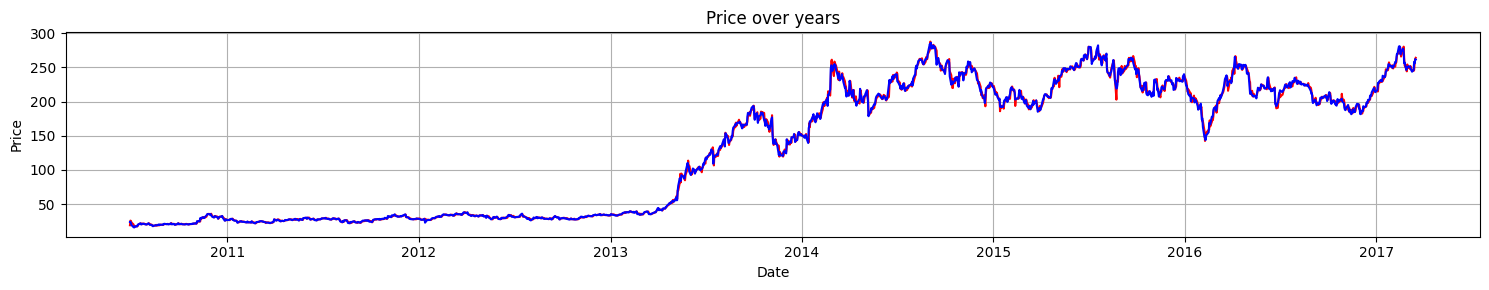

In [98]:
plt.figure(figsize=(15, 3))

plt.plot(df["Date"], df["Open"], linestyle="-", color="red")
plt.plot(df["Date"], df["Close"], linestyle="-", color="blue")

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price over years")

plt.grid(True)
plt.tight_layout()


plt.show()



<Axes: title={'center': 'Monthly Average'}, xlabel='Date'>

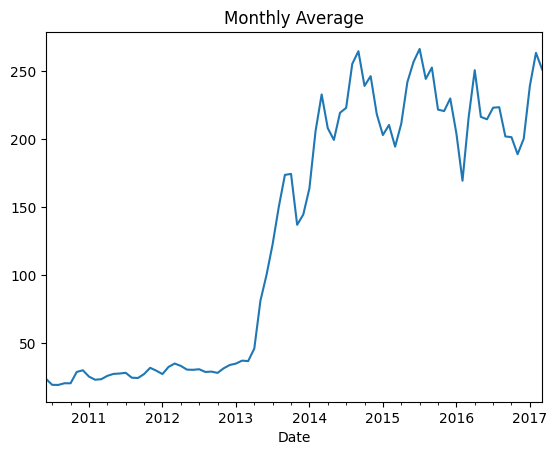

In [99]:
df_mod = df.copy()

df_mod.set_index('Date')['Close'].resample('M').mean().plot(title='Monthly Average')


In [100]:
df = df.sort_values("Date")

In [101]:
from prophet import Prophet

df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [102]:
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjp3ytvj6/ebvbmknu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjp3ytvj6/lcvqom48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62776', 'data', 'file=/tmp/tmpjp3ytvj6/ebvbmknu.json', 'init=/tmp/tmpjp3ytvj6/lcvqom48.json', 'output', 'file=/tmp/tmpjp3ytvj6/prophet_model6s9z7fz8/prophet_model-20250628085150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:51:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:51:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [113]:
future = model.make_future_dataframe(periods=3000)

In [114]:
forecast = model.predict(future)

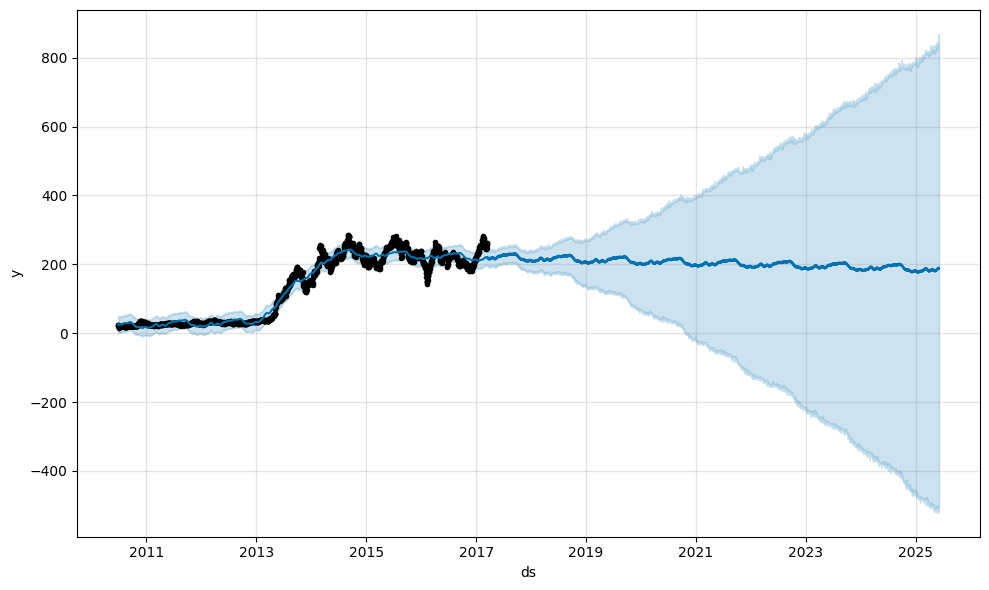

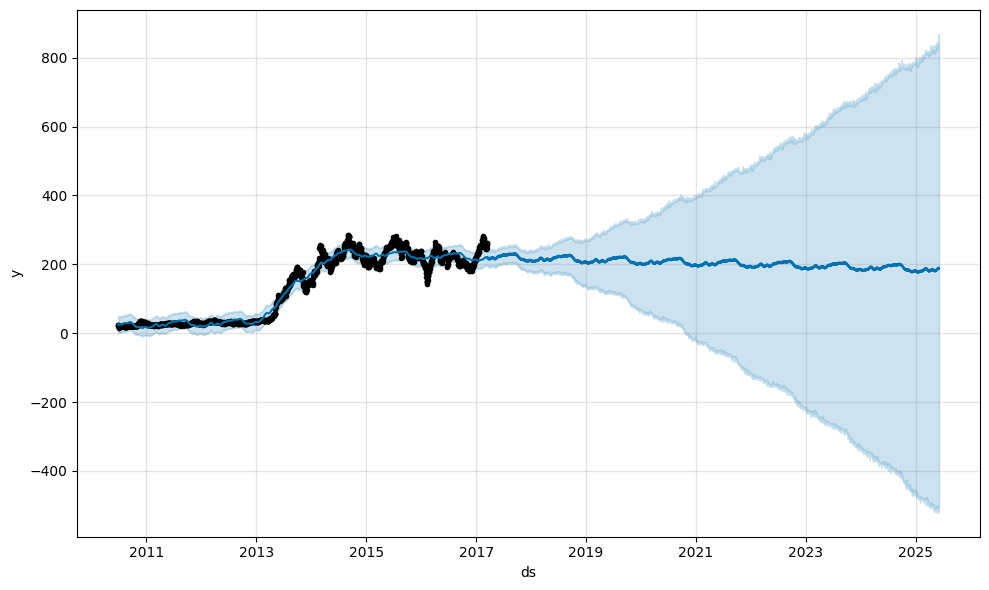

In [115]:
model.plot(forecast)

In [116]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4687,2025-05-30,186.118917,-518.247422,849.478540
4688,2025-05-31,190.165038,-504.129156,841.331577
4689,2025-06-01,190.284717,-504.016471,868.877527
4690,2025-06-02,186.553254,-511.929180,854.352744
4691,2025-06-03,186.926956,-512.939645,838.185409


In [117]:
last_price = df_prophet['y'].iloc[-1]
future_price = forecast['yhat'].iloc[-1]

if future_price > last_price:
    print("✅ Likely beneficial: price is expected to rise.")
else:
    print("❌ Not beneficial: price is expected to fall or stay flat.")

❌ Not beneficial: price is expected to fall or stay flat.
